# DOCSIS 3.1 Medium Code Performance

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import sdfec_client

%matplotlib inline

### Hardware Setup

In [2]:
client = sdfec_client.SDFECClient("http://localhost:8230/api")

In [3]:
client.status;

In [4]:
docsis_medium_code = sdfec_client.parse_yaml("docsis_31_medium.sdfec.yml")

In [5]:
docsis_medium_code_id = client.add_code(docsis_medium_code)

### Hardware Simulation

In [6]:
snrs = np.linspace(3, 7, (7-3)*4, endpoint=False)
docsis_medium_results = client.simulate(docsis_medium_code_id, snrs, snr_scales=np.ones_like(snrs)*4, term_time=(30*60), term_errors=1e2, max_iterations=32).wait_progress()

FloatProgress(value=0.0, bar_style='info', description='Running: ', max=1.0)

In [7]:
# Reference Data from Xilinx

docsis_medium_ref = np.array([[3, 0.09314376984126985],
 [3.25, 0.08651821428571428],
 [3.5, 0.07991150793650793],
 [3.75, 0.07338222222222222],
 [4, 0.06675714285714286],
 [4.25, 0.06019753968253969],
 [4.5, 0.05342152777777778],
 [4.75, 0.04613039682539682],
 [5, 0.03792646825396825],
 [5.25, 0.02457871031746032],
 [5.5, 0.00533875],
 [5.75, 0.0001281459435626102],
 [6, 2.150350329607709e-07],
 [6.25, 4.861353862662688e-10],
 [6.5, 2.141238513541631e-10],
 [6.75, 9.516413426099798e-11]])

## Results

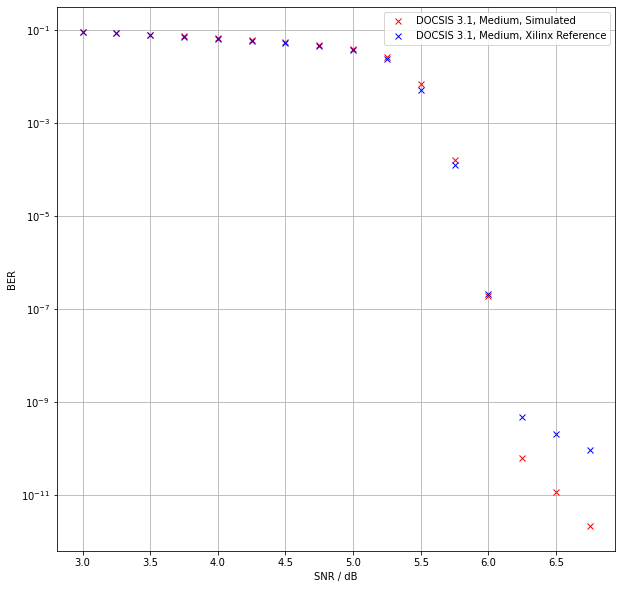

In [8]:
plt.figure(figsize=(10, 10))
plt.yscale("log")

plt.plot(snrs, docsis_medium_results["bers"], "rx")
plt.plot(docsis_medium_ref[:,0], docsis_medium_ref[:,1], "bx")

plt.xlabel("SNR / dB")
plt.ylabel("BER")

plt.legend(["DOCSIS 3.1, Medium, Simulated",
            "DOCSIS 3.1, Medium, Xilinx Reference"
           ])

plt.grid()

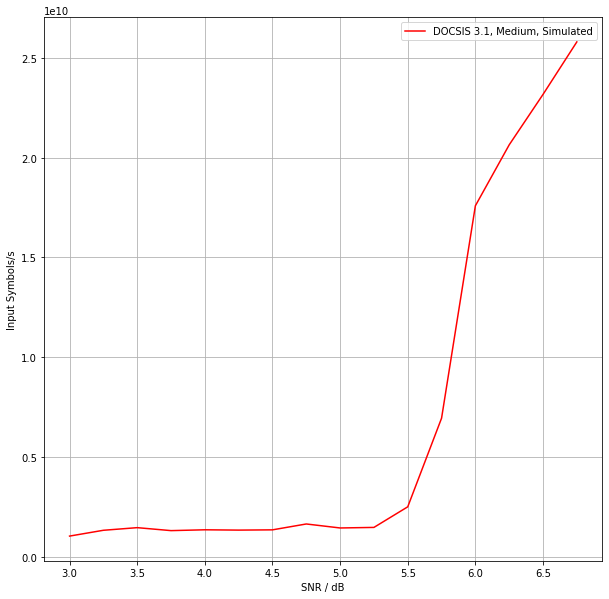

In [9]:
plt.figure(figsize=(10, 10))

plt.plot(snrs, docsis_medium_results["speeds"], "r")

plt.xlabel("SNR / dB")
plt.ylabel("Input Symbols/s")

plt.legend(["DOCSIS 3.1, Medium, Simulated"])

plt.grid()